# Find Dominant Colors in an Image through k-means Clustering

Size of the logo =  (212, 332, 3)


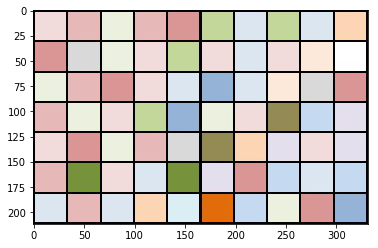

In [45]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

logo = mpimg.imread('Data/DataQuestLogo.jpg')
#logo = mpimg.imread('Data/Checks.jpg')
#logo = mpimg.imread('Data/MultiColor.jpg')
print("Size of the logo = ", logo.shape)

plt.imshow(logo)

In [46]:
r = []
g = []
b = []

for line in logo:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
       
#print("r matrix:")
#print(r)
#print("\ng matrix:")
#print(g)
#print("\nb matrix:")
#print(b)

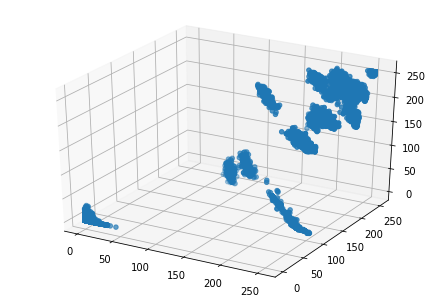

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [48]:
import pandas as pd

df = pd.DataFrame({'red':r , 'green':g, 'blue':b})

In [49]:
from scipy.cluster.vq import whiten

# The whiten() function takes one argument, a list or array of the values of a variable, and returns the standardized values
df['scaled_red'] = whiten(df['red'])
df['scaled_green'] = whiten(df['green'])
df['scaled_blue'] = whiten(df['blue'])

df.sample(n=10)

,red,green,blue,scaled_red,scaled_green,scaled_blue
22061,220,230,240,2.793481,3.003541,2.952048
69053,152,179,208,1.930041,2.337538,2.558441
24538,219,149,151,2.780783,1.945772,1.857330
18624,205,156,160,2.603016,2.037184,1.968032
19643,216,216,218,2.742690,2.820717,2.681443
58009,197,217,241,2.501435,2.833776,2.964348
13705,236,240,223,2.996643,3.134130,2.742944
37031,236,240,223,2.996643,3.134130,2.742944
37328,152,178,215,1.930041,2.324480,2.644543
38346,0,3,0,0.000000,0.039177,0.000000


In [50]:
from scipy.cluster.vq import kmeans

# num_clusters depends on the above 3 dimensional graph
# For the image - DataQuest Logo we can specify it as 3
# For the image - MultiColor we can specify it as 15 or so
# For the image - Checks we can specify it as 9
num_clusters = 3

# The kmeans() function has two required arguments 
#     — the observations and the number of clusters. 
# It returns two values 
#    — the cluster centers and the distortion. 
# Distortion is the sum of squared distances between each point and its nearest cluster center
# We will not be using distortion in this tutorial
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], num_clusters)
print(cluster_centers)

[[1.91882707 1.76917046 0.74811565]
 [2.91231337 2.4106109  2.26588646]
 [1.89566412 2.33652035 2.63189294]
 [2.74826484 2.93584624 2.90727615]
 [0.04402218 0.01374683 0.03092176]
 [3.18687355 2.78552499 2.22661484]
 [2.47778438 2.80279084 1.90817104]
 [3.05721807 3.00307441 2.73342261]
 [2.75251453 1.96317254 1.83840193]]


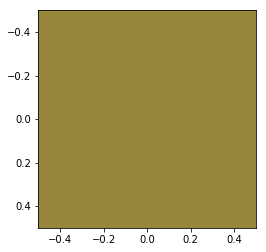

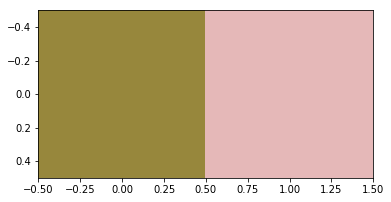

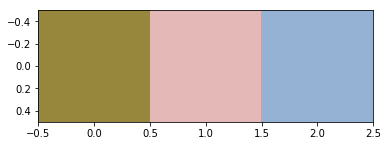

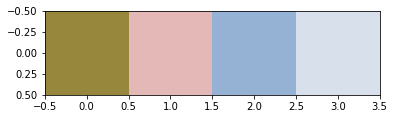

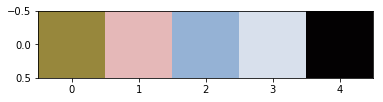

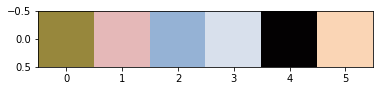

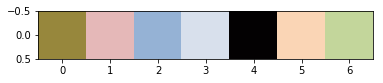

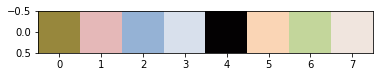

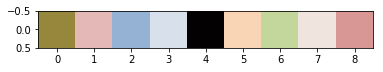

In [51]:
# we get are standardized versions of RGB values
# To get the original color values we need to multiply them with their standard deviations

# We will display the colors in the form of a palette using the imshow() method of matplotlib's pyplot class. 
# However, to display colors, imshow() needs the values of RGB in the range of 0 to 1, 
# where 1 signifies 255 in our original scale of RGB values. 
# We therefore must divide each RGB component of our cluster centers with 255 in order to get to a value between 0 to 1, 
# and display them through the imshow() method.

colors = []
# Get standard deviation(s) for red, green, blue
r_std, g_std, b_std = df[['red', 'green', 'blue']].std() 
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255,
                   scaled_g * g_std / 255,
                   scaled_b * b_std / 255))
    plt.imshow([colors])
    plt.show()